In [1]:
# fetching libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn import preprocessing
import seaborn as sns

import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# Understanding the dataset

In [2]:
# loading the Credit_data dataset
%cd /Users/agamchug/Desktop/Bayes/DTVC
df = pd.read_csv('Credit_data.csv')
df.head().T

/Users/agamchug/Desktop/Bayes/DTVC


,0,1,2,3,4
ID,1.0,2.0,3.0,4.0,5.0
LIMIT_BAL,20000.0,90000.0,50000.0,50000.0,50000.0
SEX,2.0,2.0,2.0,1.0,1.0
EDUCATION,2.0,2.0,2.0,2.0,1.0
MARRIAGE,1.0,2.0,1.0,1.0,2.0
AGE,24.0,34.0,37.0,57.0,37.0
PAY_1,2.0,0.0,0.0,-1.0,0.0
PAY_2,2.0,0.0,0.0,0.0,0.0
PAY_3,-1.0,0.0,0.0,-1.0,0.0
PAY_4,-1.0,0.0,0.0,0.0,0.0


In [59]:
df.groupby(['default_0']).count()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
default_0,,,,,,,,,,,,,,,,,,,,,
0,18694,18694,18694,18694,18694,18694,18694,18694,18694,18694,...,18694,18694,18694,18694,18694,18694,18694,18694,18694,18694
1,5306,5306,5306,5306,5306,5306,5306,5306,5306,5306,...,5306,5306,5306,5306,5306,5306,5306,5306,5306,5306


In [3]:
df.groupby(['SEX']).count()

,ID,LIMIT_BAL,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_0
SEX,,,,,,,,,,,,,,,,,,,,,
1,9578,9578,9578,9578,9578,9578,9578,9578,9578,9578,...,9578,9578,9578,9578,9578,9578,9578,9578,9578,9578
2,14422,14422,14422,14422,14422,14422,14422,14422,14422,14422,...,14422,14422,14422,14422,14422,14422,14422,14422,14422,14422


In [4]:
df.groupby(['EDUCATION']).count()

,ID,LIMIT_BAL,SEX,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_0
EDUCATION,,,,,,,,,,,,,,,,,,,,,
0,11,11,11,11,11,11,11,11,11,11,...,11,11,11,11,11,11,11,11,11,11
1,8486,8486,8486,8486,8486,8486,8486,8486,8486,8486,...,8486,8486,8486,8486,8486,8486,8486,8486,8486,8486
2,11213,11213,11213,11213,11213,11213,11213,11213,11213,11213,...,11213,11213,11213,11213,11213,11213,11213,11213,11213,11213
3,3944,3944,3944,3944,3944,3944,3944,3944,3944,3944,...,3944,3944,3944,3944,3944,3944,3944,3944,3944,3944
4,90,90,90,90,90,90,90,90,90,90,...,90,90,90,90,90,90,90,90,90,90
5,217,217,217,217,217,217,217,217,217,217,...,217,217,217,217,217,217,217,217,217,217
6,39,39,39,39,39,39,39,39,39,39,...,39,39,39,39,39,39,39,39,39,39


In [5]:
df.groupby(['MARRIAGE']).count()

,ID,LIMIT_BAL,SEX,EDUCATION,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_0
MARRIAGE,,,,,,,,,,,,,,,,,,,,,
0,42,42,42,42,42,42,42,42,42,42,...,42,42,42,42,42,42,42,42,42,42
1,10897,10897,10897,10897,10897,10897,10897,10897,10897,10897,...,10897,10897,10897,10897,10897,10897,10897,10897,10897,10897
2,12808,12808,12808,12808,12808,12808,12808,12808,12808,12808,...,12808,12808,12808,12808,12808,12808,12808,12808,12808,12808
3,253,253,253,253,253,253,253,253,253,253,...,253,253,253,253,253,253,253,253,253,253


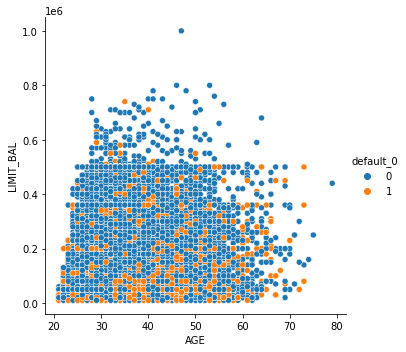

In [6]:
# visualising default_0 with respect to the features of the dataset
sns.relplot(x="AGE",y="LIMIT_BAL",hue="default_0",data=df)
plt.show()


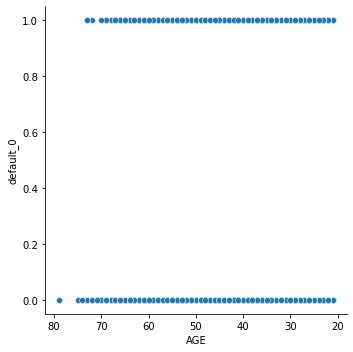

In [7]:
sns.relplot(x="AGE",y="default_0",data=df)
plt.gca().invert_xaxis()
plt.show()



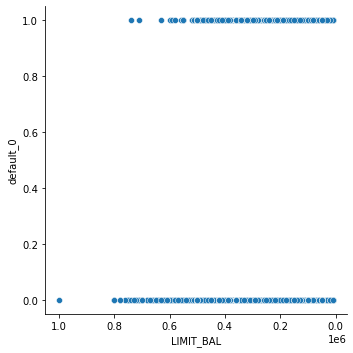

In [8]:
sns.relplot(x="LIMIT_BAL",y="default_0",data=df)
plt.gca().invert_xaxis()
plt.show()


<AxesSubplot:xlabel='LIMIT_BAL', ylabel='Count'>

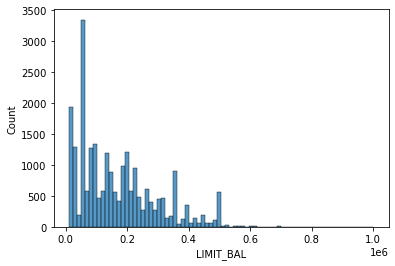

In [9]:
sns.histplot(x='LIMIT_BAL', data=df)

<AxesSubplot:xlabel='BILL_AMT1', ylabel='Count'>

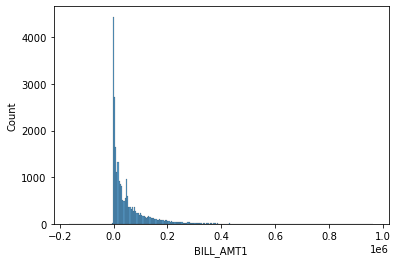

In [10]:
sns.histplot(x='BILL_AMT1', data=df)

<AxesSubplot:xlabel='PAY_AMT1', ylabel='Count'>

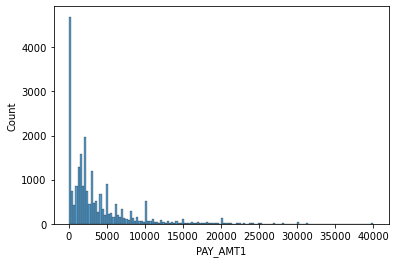

In [11]:
sns.histplot(x='PAY_AMT1', data=df, binrange=(0,40000))

# Creating a basic logistic regression model

In [12]:
# Creating y and X matrix
y = df['default_0']
X = df.drop(columns=['default_0'])


In [13]:
# Splitting the dataset 
trainX, otherX, trainY, otherY = train_test_split(X, y, test_size=0.5,random_state = 726)
testX, validationX, testY, validationY = train_test_split(otherX, otherY, test_size=0.5,random_state = 1592)
# Defining the model
logm = LogisticRegression(max_iter=1000)
logm.fit(trainX, trainY.values.ravel()) 


LogisticRegression(max_iter=1000)

In [14]:
# Checking model stats
print("Intercept = ",logm.intercept_) 
print("Model coefficients = ", logm.coef_) 
print("R^2 =",logm.score(X,y)) 

Intercept =  [-0.00050261]
Model coefficients =  [[-1.06766245e-05 -2.92764861e-06 -9.36464069e-04 -1.09442050e-03
  -9.73249004e-04 -1.37622265e-02  2.43870139e-03  1.85976734e-03
   1.66887113e-03  1.48526992e-03  1.34493604e-03  1.30215701e-03
  -7.08760586e-06  2.16576926e-06  2.59953579e-06  1.78977285e-06
   2.08007801e-06  3.52147344e-06 -3.47174251e-05 -1.49076372e-05
  -6.67742057e-06 -1.71099654e-05 -8.80995141e-06 -1.89711336e-06]]
R^2 = 0.7789583333333333


In [15]:
# Calculating prediction pro0babilities
logm.predict_proba(validationX)
Y_probs=logm.predict_proba(validationX)[:,1]

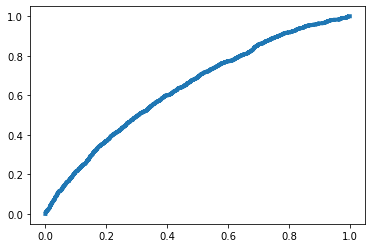

In [16]:
# Visualising the ROC
from matplotlib import pyplot
fpr, tpr, thresholds = metrics.roc_curve(validationY,Y_probs)
pyplot.plot(fpr, tpr, linewidth=4)
plt.show()

In [17]:
print("The threshold at index 10 is " + str(thresholds[10]))
print("The false positive rate at this threshold is " + str(fpr[10]))
print("The true positive rate at this threshold is " + str(tpr[10])) 

The threshold at index 10 is 0.4002497407471142
The false positive rate at this threshold is 0.002593473092716663
The true positive rate at this threshold is 0.010924981791697014


In [18]:
roc_auc_score(validationY,Y_probs)

# The AUC is quite low on the basic model. Need to explore how scaling and creating dummy variables may change the prediciton accuracy. 

0.638745537253944

# Scaling the Limits, Bills, and Payments

In [19]:
df2 = df.iloc[:,2:12] # New dataframe without the id, Limits, Bills, Payments, and default_0 columns
Limits = df.iloc[:,1] # Just the Limits column
Bills = df.iloc[:,12:18] # All the Bills columns
Payments = df.iloc[:,18:24] # All the Payments columns
Limits_scaled = preprocessing.scale(Limits) # Standardising the Limits
Bills_scaled = preprocessing.scale(Bills) # Standardising the Bills
Payments_scaled = preprocessing.scale(Payments) # Standardising the Payments
df2_scaled = pd.concat([df2, pd.DataFrame(Limits_scaled)], axis=1) # Stitching the standardised column back to the dataframe
df2_scaled.rename(columns={0:'LIMIT_BAL'},inplace=True) # Renaming the new column
df2_scaled = pd.concat([df2_scaled, pd.DataFrame(Bills_scaled)], axis=1)
df2_scaled.rename(columns={0:'BILL_AMT1', 1:'BILL_AMT2', 2:'BILL_AMT3', 3:'BILL_AMT4', 4:'BILL_AMT5', 5:'BILL_AMT6'},inplace=True)
df2_scaled = pd.concat([df2_scaled, pd.DataFrame(Payments_scaled)], axis=1)
df2_scaled.rename(columns={0:'PAY_AMT1', 1:'PAY_AMT2', 2:'PAY_AMT3', 3:'PAY_AMT4', 4:'PAY_AMT5', 5:'PAY_AMT6'},inplace=True)
df2_scaled.head().T

,0,1,2,3,4
SEX,2.000000,2.000000,2.000000,1.000000,1.000000
EDUCATION,2.000000,2.000000,2.000000,2.000000,1.000000
MARRIAGE,1.000000,2.000000,1.000000,1.000000,2.000000
AGE,24.000000,34.000000,37.000000,57.000000,37.000000
PAY_1,2.000000,0.000000,0.000000,-1.000000,0.000000
PAY_2,2.000000,0.000000,0.000000,0.000000,0.000000
PAY_3,-1.000000,0.000000,0.000000,-1.000000,0.000000
PAY_4,-1.000000,0.000000,0.000000,0.000000,0.000000
PAY_5,-2.000000,0.000000,0.000000,0.000000,0.000000
PAY_6,-2.000000,0.000000,0.000000,0.000000,0.000000


# Crearting Dummy variables for Sex, Education, Marriage, and Pay

In [20]:
# sex
df2_scaled = pd.get_dummies(df2_scaled, columns = ['SEX']) # initiating dummies
df2_scaled = df2_scaled.drop(["SEX_2"], axis = 1) # remving the female column 
df2_scaled = df2_scaled.rename({'SEX_1': 'SEX_MALE'}, axis=1) # reference category

# education [[CHECK AGAIN IF THIS MAKES SENSE, WHY 4 (REF CAT) NOT REMOVED???]]
df2_scaled = pd.get_dummies(df2_scaled, columns = ['EDUCATION']) 
df2_scaled = df2_scaled.drop(["EDUCATION_0", "EDUCATION_5", "EDUCATION_6"], axis = 1) # since 0,5, and 6 had very few observations, we can drop them to constitute a reference category of 'others'.

# marriage [[CHECK AGAIN IF THIS MAKES SENSE, WHY 0_3 (REF CAT) NOT REMOVED???]]
df2_scaled = pd.get_dummies(df2_scaled, columns = ['MARRIAGE']) 
df2_scaled['MARRIAGE_0_3'] = (df2_scaled.MARRIAGE_0 | df2_scaled.MARRIAGE_3).astype(int)
df2_scaled = df2_scaled.drop(["MARRIAGE_0", "MARRIAGE_3"], axis = 1) # combined these 2 categories due to very small sizes. 

# pay
PAYS = ["PAY_1", "PAY_2", "PAY_3", "PAY_4", "PAY_5", "PAY_6"] # simplifying this column into a binary variable to reflect if the observation has had any standing payments or not for all the 6 months.
for i in PAYS:
    df2_scaled[i] = df2_scaled[i].replace(-2,0).replace(-1,0) # 0 if no pending payments
    df2_scaled[i] = df2_scaled[i].replace(2,1).replace(3,1).replace(4,1).replace(5,1).replace(6,1).replace(7,1).replace(8,1).replace(9,1) # 1 if pending payments

In [21]:
# completing the new dataset by adding 'default_0'
df2_scaled['default_0'] = df['default_0'] 
df2_scaled.head().T

,0,1,2,3,4
AGE,24.000000,34.000000,37.000000,57.000000,37.000000
PAY_1,1.000000,0.000000,0.000000,0.000000,0.000000
PAY_2,1.000000,0.000000,0.000000,0.000000,0.000000
PAY_3,0.000000,0.000000,0.000000,0.000000,0.000000
PAY_4,0.000000,0.000000,0.000000,0.000000,0.000000
PAY_5,0.000000,0.000000,0.000000,0.000000,0.000000
PAY_6,0.000000,0.000000,0.000000,0.000000,0.000000
LIMIT_BAL,-1.138345,-0.599489,-0.907406,-0.907406,-0.907406
BILL_AMT1,-0.640803,-0.296915,-0.055884,-0.576930,0.180517
BILL_AMT2,-0.646348,-0.492875,-0.012355,-0.610273,0.111772


# Rerunning Logistic Regression on the modified dataframe

In [22]:
y = df2_scaled['default_0']
X = df2_scaled.drop(columns=['default_0'])

In [23]:
logm = LogisticRegression(max_iter=1000).fit(X,y)

In [24]:
print("Intercept = ",logm.intercept_) # Print the resultant model intercept 
print("Model coefficients = ", logm.coef_) # Print the resultant model coefficients (in order of variables in X)
print("R^2 =",logm.score(X,y)) # Print the resultant model R-squared

Intercept =  [-2.71730781]
Model coefficients =  [[ 0.00454623  1.31328497  0.12688139  0.35802363  0.29872136  0.28622901
   0.40662434 -0.19565355 -0.09668936  0.17366015  0.11436671 -0.09378874
   0.08327976 -0.07148389 -0.17178478 -0.2141849  -0.01674246 -0.07364251
  -0.03078265 -0.03328936  0.14541081  0.98891338  0.98923061  0.94942593
  -0.25048712 -0.32004968 -0.48663336 -0.36353803]]
R^2 = 0.8070416666666667


In [25]:
trainX, otherX, trainY, otherY = train_test_split(X, y, test_size=0.5,random_state = 726)

In [26]:
testX, validationX, testY, validationY = train_test_split(otherX, otherY, test_size=0.5,random_state = 1592)

In [27]:
logm = LogisticRegression(max_iter=1000)
logm.fit(trainX, trainY.values.ravel()) # Fit a logistic regression with vector Y as dependent and matrix X as independent
print(logm.intercept_)
print(logm.coef_)
print(logm.score(trainX, trainY))

[-3.05920505]
[[ 0.00582114  1.37884042  0.05807453  0.42790366  0.24678856  0.25323022
   0.38905836 -0.20777804 -0.02447972  0.04080548  0.1219396  -0.02958599
   0.05599796 -0.04302766 -0.26027236 -0.12018126 -0.01313226 -0.13537696
  -0.04605598 -0.04303573  0.12422149  1.02076136  1.04442148  0.99954126
   0.35673071 -0.12685995 -0.22379397 -0.18046845]]
0.8094166666666667


In [28]:
logm.predict_proba(validationX)

array([[0.94384439, 0.05615561],
       [0.88705807, 0.11294193],
       [0.84797329, 0.15202671],
       ...,
       [0.88565893, 0.11434107],
       [0.83044475, 0.16955525],
       [0.85865209, 0.14134791]])

In [29]:
Y_probs=logm.predict_proba(validationX)[:,1]

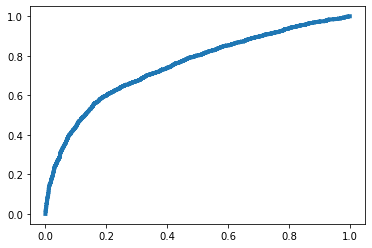

In [30]:
from matplotlib import pyplot
fpr, tpr, thresholds = metrics.roc_curve(validationY,Y_probs)
pyplot.plot(fpr, tpr, linewidth=4)
plt.show()

In [31]:
print("The threshold at index 10 is " + str(thresholds[12]))
print("The false positive rate at this threshold is " + str(fpr[12]))
print("The true positive rate at this threshold is " + str(tpr[12])) 

The threshold at index 10 is 0.7677095585526031
The false positive rate at this threshold is 0.001080613788631943
The true positive rate at this threshold is 0.02039329934450109


In [32]:
roc_auc_score(validationY,Y_probs)
# far better AUC than without scaling and dummies

0.7500045255129533

# Checking for the best threshold

In [33]:
# J-stat:
J = tpr - fpr
threshold_idx = np.argmax(J)
chosen_threshold = thresholds[threshold_idx]
np.max(J)

0.40316275901084725

In [34]:
print("At threshold " + str(chosen_threshold))
print("the false positive rate is " + str(fpr[threshold_idx]))
print("and the true positive rate is " + str(tpr[threshold_idx]))

At threshold 0.20992147980283332
the false positive rate is 0.18824292197968445
and the true positive rate is 0.5914056809905317


In [35]:
Y_pred = np.where(Y_probs > chosen_threshold, 1, 0)
Y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [36]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(validationY,Y_pred)
print(cm)

[[3756  871]
 [ 562  811]]


In [37]:
TN = cm[0][0]
FP = cm[0][1]
FN = cm[1][0]
TP = cm[1][1]

In [38]:
1-TN/(TN+FP) # 1- specificity or FPR

0.1882429219796845

In [39]:
TP/(TP+FN) # TPR or sensitivity 

0.5906773488710853

In [40]:
TN/(TN+FP) # specificity

0.8117570780203155

In [41]:
# sensitivity dropped as t increased
# specificity increased as t increased 

In [42]:
# profit based on the J-stat threshold
TN*1500 - FN*5000 # Since profit/loss for FP and TP are 0, we only use TN and FN

2824000

In [43]:
# trying to calculate the profit for all the thresholds iteratively, and finding the best threshold based on the highest profit
profits = []
Y_probs=logm.predict_proba(validationX)[:,1]
for i in thresholds:
    Y_pred = np.where(Y_probs > i, 1, 0)
    cm = confusion_matrix(validationY,Y_pred)
    TN = cm[0][0]
    FP = cm[0][1]
    FN = cm[1][0]
    TP = cm[1][1]
    profit = TN*1500 - FN*5000
    profits.append(profit)
print(np.max(profits))
print(np.argmax(profits))
final_threshold = thresholds[np.argmax(profits)]
final_threshold
Y_pred = np.where(Y_probs > final_threshold, 1, 0)
cm = confusion_matrix(validationY,Y_pred)
print(cm)
TN = cm[0][0]
FN = cm[1][0]
profit = TN*1500 - FN*5000
print(profit)
# Although the thresholds are somewhat similar, the cost matrix delivered a slightly better performance than the J-stat based on the profit calculation.
# Hence, the final threshold is chosen using the computation above.  

2825500
753
[[3757  870]
 [ 562  811]]
2825500


In [44]:
# finalising the model and threshold on the test set
trainX_final=pd.concat([trainX, validationX])
trainY_final=pd.concat([trainY, validationY])
logm = LogisticRegression(max_iter=1000).fit(trainX_final, trainY_final.values.ravel())
Y_test_probs=logm.predict_proba(testX)[:,1]
Y_test_pred = np.where(Y_test_probs > final_threshold, 1, 0) # predict the classes for test data based on the threshold found via the validation data

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(testY,Y_test_pred)
print(cm)
TN = cm[0][0]
FP = cm[0][1]
FN = cm[1][0]
TP = cm[1][1]
TN*1500 - FN*5000


[[3840  842]
 [ 563  755]]


2945000

In [45]:
# True Negative Rate is important because we need to maximise true negatives and minimise false positives. This is because we have to target those who do not default and not those who end up defaulting and creating losses.
# Again, in our case, there is no cost associated to to FP and TP because we simply do not target them. However, having fewer FP would also help to target more profitable customers. 
TN/(TN+FP)

0.8201623237932507

In [46]:
# Model accuracy and average number of predicted defaulters.
print((TN+TP)/(TN+FP+FN+TP))
np.mean(Y_test_pred)

0.7658333333333334


0.26616666666666666

# Predicting for the 1000 new applicants based on the scaled dataset and threshold chosen using the profit function.

In [47]:
%cd /Users/agamchug/Desktop/Bayes/DTVC
df_new = pd.read_csv('New_applications.csv')
df_new.drop(columns=['Unnamed: 24'],inplace=True)
df_new.head().T

/Users/agamchug/Desktop/Bayes/DTVC


,0,1,2,3,4
ID,n1000-1,n1000-2,n1000-3,n1000-4,n1000-5
LIMIT_BAL,500000,210000,150000,20000,400000
SEX,1,1,1,1,1
EDUCATION,1,1,1,2,2
MARRIAGE,2,2,2,1,1
AGE,29,29,27,38,34
PAY_1,0,-2,0,0,-1
PAY_2,0,-2,0,0,-1
PAY_3,0,-2,0,0,-1
PAY_4,0,-2,0,0,-1


In [48]:

df_new2 = df_new.iloc[:,2:12]
Limits = df_new.iloc[:,1]
Bills = df_new.iloc[:,12:18]
Payments = df_new.iloc[:,18:24]
Limits_scaled = preprocessing.scale(Limits)
Bills_scaled = preprocessing.scale(Bills)
Payments_scaled = preprocessing.scale(Payments)
df_new2_scaled = pd.concat([df_new2, pd.DataFrame(Limits_scaled)], axis=1)
df_new2_scaled.rename(columns={0:'LIMIT_BAL'},inplace=True)
df_new2_scaled = pd.concat([df_new2_scaled, pd.DataFrame(Bills_scaled)], axis=1)
df_new2_scaled.rename(columns={0:'BILL_AMT1', 1:'BILL_AMT2', 2:'BILL_AMT3', 3:'BILL_AMT4', 4:'BILL_AMT5', 5:'BILL_AMT6'},inplace=True)
df_new2_scaled = pd.concat([df_new2_scaled, pd.DataFrame(Payments_scaled)], axis=1)
df_new2_scaled.rename(columns={0:'PAY_AMT1', 1:'PAY_AMT2', 2:'PAY_AMT3', 3:'PAY_AMT4', 4:'PAY_AMT5', 5:'PAY_AMT6'},inplace=True)
df_new2_scaled.head().T

,0,1,2,3,4
SEX,1.000000,1.000000,1.000000,1.000000,1.000000
EDUCATION,1.000000,1.000000,1.000000,2.000000,2.000000
MARRIAGE,2.000000,2.000000,2.000000,1.000000,1.000000
AGE,29.000000,29.000000,27.000000,38.000000,34.000000
PAY_1,0.000000,-2.000000,0.000000,0.000000,-1.000000
PAY_2,0.000000,-2.000000,0.000000,0.000000,-1.000000
PAY_3,0.000000,-2.000000,0.000000,0.000000,-1.000000
PAY_4,0.000000,-2.000000,0.000000,0.000000,-1.000000
PAY_5,0.000000,-2.000000,0.000000,0.000000,-1.000000
PAY_6,0.000000,-2.000000,0.000000,-1.000000,-1.000000


In [49]:
df_new2_scaled = pd.get_dummies(df_new2_scaled, columns = ['SEX'])
df_new2_scaled = df_new2_scaled.drop(["SEX_2"], axis = 1)
df_new2_scaled = df_new2_scaled.rename({'SEX_1': 'SEX_MALE'}, axis=1)

df_new2_scaled = pd.get_dummies(df_new2_scaled, columns = ['MARRIAGE'])
df_new2_scaled['MARRIAGE_0_3'] = (df_new2_scaled.MARRIAGE_0 | df_new2_scaled.MARRIAGE_3).astype(int)
df_new2_scaled = df_new2_scaled.drop(["MARRIAGE_0", "MARRIAGE_3"], axis = 1)

df_new2_scaled = pd.get_dummies(df_new2_scaled, columns = ['EDUCATION'])
df_new2_scaled = df_new2_scaled.drop(["EDUCATION_0", "EDUCATION_5", "EDUCATION_6"], axis = 1)

PAYS = ["PAY_1", "PAY_2", "PAY_3", "PAY_4", "PAY_5", "PAY_6"]
for i in PAYS:
    df_new2_scaled[i] = df_new2_scaled[i].replace(-2,0).replace(-1,0)
    df_new2_scaled[i] = df_new2_scaled[i].replace(2,1).replace(3,1).replace(4,1).replace(5,1).replace(6,1).replace(7,1).replace(8,1).replace(9,1)

In [50]:
Y_final_probs=logm.predict_proba(df_new2_scaled)[:,1]
Y_final_predict = np.where(Y_final_probs > final_threshold, 1, 0)
len(Y_final_predict)


/Users/agamchug/.conda/envs/pythonProject1/lib/python3.9/site-packages/sklearn/base.py:488: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


1000

In [51]:
np.mean(Y_final_predict) # We do not issue credit to these 28.5% of applicants

0.285

In [52]:
# Adding probabilities to the dataframe
df_new2_scaled['default_probs'] = Y_final_probs

In [53]:
# Adding default predictions to the dataframe
df_new2_scaled['default_pred'] = Y_final_predict

In [54]:
# Creating credit issue decisions based on the default predictions. Here 1 implies credit can be issued and 0 implies credit cannot be issued.
Issue_Credit = []
for i in df_new2_scaled['default_pred']:
    if i == 0:
        Issue_Credit.append(1)
    elif i == 1:
        Issue_Credit.append(0)
df_new2_scaled['Issue_Credit'] = Issue_Credit

In [55]:
# Reinstating the ID column
df_new2_scaled['ID'] = df_new['ID']

In [56]:
df_new2_scaled.head().T

,0,1,2,3,4
AGE,29,29,27,38,34
PAY_1,0,0,0,0,0
PAY_2,0,0,0,0,0
PAY_3,0,0,0,0,0
PAY_4,0,0,0,0,0
PAY_5,0,0,0,0,0
PAY_6,0,0,0,0,0
LIMIT_BAL,2.632642,0.362718,-0.106921,-1.124473,1.84991
BILL_AMT1,4.532902,-0.716121,0.510798,-0.459736,-0.435671
BILL_AMT2,5.458975,-0.717552,0.57327,-0.427226,-0.572652


# Answers to the assignment questions.

In [57]:
# Q1: Recommendation for 1000 clients
print(*Issue_Credit)

1 1 1 1 1 0 0 1 0 1 1 1 1 1 0 1 1 1 0 0 1 0 1 0 1 1 1 1 1 1 1 0 0 1 0 0 1 0 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 0 1 0 0 1 1 1 0 1 0 0 1 0 0 0 1 0 1 1 0 1 1 1 1 0 0 0 1 1 1 1 0 0 0 1 0 1 1 1 1 1 0 1 0 0 0 1 1 1 1 1 1 1 1 0 0 0 0 1 1 1 1 1 1 1 0 1 0 1 1 1 0 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 0 1 0 1 1 1 1 1 0 1 0 0 1 1 1 0 1 1 1 1 1 0 1 1 1 1 0 1 1 0 1 0 0 0 0 1 1 1 1 1 0 1 1 0 0 0 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 0 1 0 1 1 1 0 0 1 1 1 0 0 1 1 1 1 1 0 0 1 1 0 0 0 1 0 1 1 1 0 0 1 0 1 1 0 0 0 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1 1 0 0 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 0 0 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 0 0 1 0 1 0 0 1 1 0 0 1 0 1 1 0 1 1 1 0 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 0 0 1 1 1 1 1 1 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 0 1 1 1 1 1 1 1 0 1 1 0 0 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 0 0 0 0 1 1 1 1 1 1 1 1 0 1 0 1 0 1 0 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 1 1 1 1 1 0 1 1 1 1 0 1 

In [58]:
# Q2: 3 most likely to repay the loan, if granted i.e. 3 least probable to default with Issue_Credit = 1
df_new2_scaled[df_new2_scaled['Issue_Credit']==1].sort_values(by = 'default_probs')
# IDs: n1000-50, n1000-969, n1000-445

,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,LIMIT_BAL,BILL_AMT1,BILL_AMT2,...,MARRIAGE_2,MARRIAGE_0_3,EDUCATION_1,EDUCATION_2,EDUCATION_3,EDUCATION_4,default_probs,default_pred,Issue_Credit,ID
49,36,0,0,0,0,0,0,1.536817,4.375245,2.405093,...,1,0,1,0,0,0,0.001607,0,1,n1000-50
968,55,0,0,0,0,0,0,1.849910,1.479991,2.178043,...,0,0,1,0,0,0,0.004643,0,1,n1000-969
444,52,0,0,0,0,0,0,0.362718,0.214885,-0.138505,...,0,0,0,0,1,0,0.011683,0,1,n1000-445
537,38,0,0,0,0,0,0,0.127898,-0.487082,1.973135,...,1,0,1,0,0,0,0.021092,0,1,n1000-538
353,40,0,0,0,0,0,0,2.632642,-0.655637,0.491421,...,0,0,1,0,0,0,0.026800,0,1,n1000-354
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
414,31,0,0,0,0,1,0,-0.028648,0.066101,-0.019359,...,0,0,0,1,0,0,0.203717,0,1,n1000-415
55,30,1,0,0,0,0,0,0.284445,-0.342050,-0.719606,...,0,0,0,1,0,0,0.203728,0,1,n1000-56
307,23,0,0,1,0,0,0,-1.124473,-0.616437,-0.592979,...,1,0,1,0,0,0,0.204253,0,1,n1000-308
255,38,0,0,1,0,0,0,0.127898,0.057014,0.094541,...,1,0,0,1,0,0,0.207082,0,1,n1000-256


In [63]:
# Q3: 3 least likely to repay the loan i.e. 3 most probable to default with Issue_Credit = 1
df_new2_scaled[df_new2_scaled['Issue_Credit']==1].sort_values(by = 'default_probs', ascending=False)
# IDs: n1000-267, n1000-256, n1000-308

,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,LIMIT_BAL,BILL_AMT1,BILL_AMT2,...,MARRIAGE_2,MARRIAGE_0_3,EDUCATION_1,EDUCATION_2,EDUCATION_3,EDUCATION_4,default_probs,default_pred,Issue_Credit,ID
266,24,0,0,0,0,0,1,-0.889654,-0.066535,-0.018969,...,1,0,0,1,0,0,0.207258,0,1,n1000-267
255,38,0,0,1,0,0,0,0.127898,0.057014,0.094541,...,1,0,0,1,0,0,0.207082,0,1,n1000-256
307,23,0,0,1,0,0,0,-1.124473,-0.616437,-0.592979,...,1,0,1,0,0,0,0.204253,0,1,n1000-308
55,30,1,0,0,0,0,0,0.284445,-0.342050,-0.719606,...,0,0,0,1,0,0,0.203728,0,1,n1000-56
414,31,0,0,0,0,1,0,-0.028648,0.066101,-0.019359,...,0,0,0,1,0,0,0.203717,0,1,n1000-415
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
353,40,0,0,0,0,0,0,2.632642,-0.655637,0.491421,...,0,0,1,0,0,0,0.026800,0,1,n1000-354
537,38,0,0,0,0,0,0,0.127898,-0.487082,1.973135,...,1,0,1,0,0,0,0.021092,0,1,n1000-538
444,52,0,0,0,0,0,0,0.362718,0.214885,-0.138505,...,0,0,0,0,1,0,0.011683,0,1,n1000-445
968,55,0,0,0,0,0,0,1.849910,1.479991,2.178043,...,0,0,1,0,0,0,0.004643,0,1,n1000-969


In [120]:
# Q4: (d) The statement above does not provide enough information to determine the best course of action.
# Although the colleague shares what a model predicts, it is not certain what model was used. 
# It could be linear regression, polynomial regression, logistic regression or CART; some models may not be appropriate for predicting a binary variable such as this one. 
# Further, the model's performance and accuracy has not been established. Even if it were a logistic regression model, it is necessary to look into how much AUC the model covers. 
# It would stand no credibility if it had an AUC around the diagonal or around 0.5, which would just make it as good as randomly picking client A or B. 
# Then, if the AUC is satisfactory, the model must show accuracy in its prediction and classification 
# - which can be obtained from the confusion matrix - in this particular case the model should particularly focus on a low FPR to avoid issuing credit to potential defaulters and incurring losses. 
# The cost is higher if A is incorrectly predicted to repay than if B is incorrectly predicted to default. Therefore, before accepting the colleague's judgement, the bank should establish the strength in the prediction. 


In [ ]:
# Q6: (d) Specificity (i.e., the percentage of correct “no” predictions) will increase.
# Q7: (b) It will not be shifting.

In [ ]:
# Q8: Consider the situation where we are predicting yes/no labels for our data at random (i.e., there is a 50% chance of picking “yes” and a 50% chance of picking “no”).
# Assume that we pick a threshold strictly between 0 and 1. Explain why, whatever this threshold, the point we obtain on the ROC curve is (1/2, 1/2).

# When we randomly predict our observations as 'yes' or 'no', then essentially it is the same situation as having a Logistic Regression model with a diagonal line running from the origion of the ROC.
# We have the probability of having a positive equal to the probability of having a negative and that is 0.5 and same is with the errors we make.
# Therefore, the AUC will be 0.5, and no matter what the threshold, TPR will always equal the FPR i.e.(0.5) because the model cannot distinguish between Positive and Negative classes.
# In other words, the percentage of correctly identified observations will be equal to the percentage of incorrectly identified observations, compared with the extreme cases 
# in which we either classify everything as positive or negative and with a TPR of 1 and 0 respectively. 